## Multiclass Classification: Wine Dataset
https://archive.ics.uci.edu/ml/datasets/wine

** Dataset Information: **

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

** Attribute Information: (13 features and 1 class)**

Class: class 1 (59), class 2 (71), class 3 (48)

1. Alcohol (class)
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

** Objective of this project **

Using chemical analysis (features) determine the origin of wines (class, 1-3)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['Class','Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
df = pd.read_csv(url, names=names)

In [3]:
# Inspect Data
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [11]:
df.shape

(178, 14)

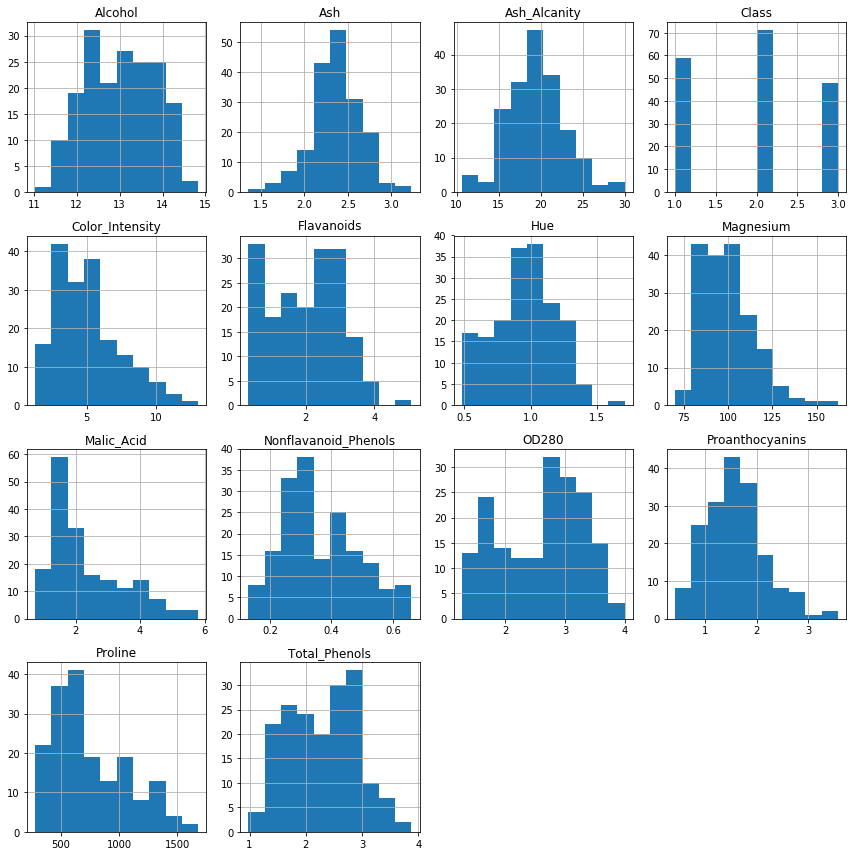

In [16]:
_ = df.hist(figsize=(12,12))
plt.tight_layout()

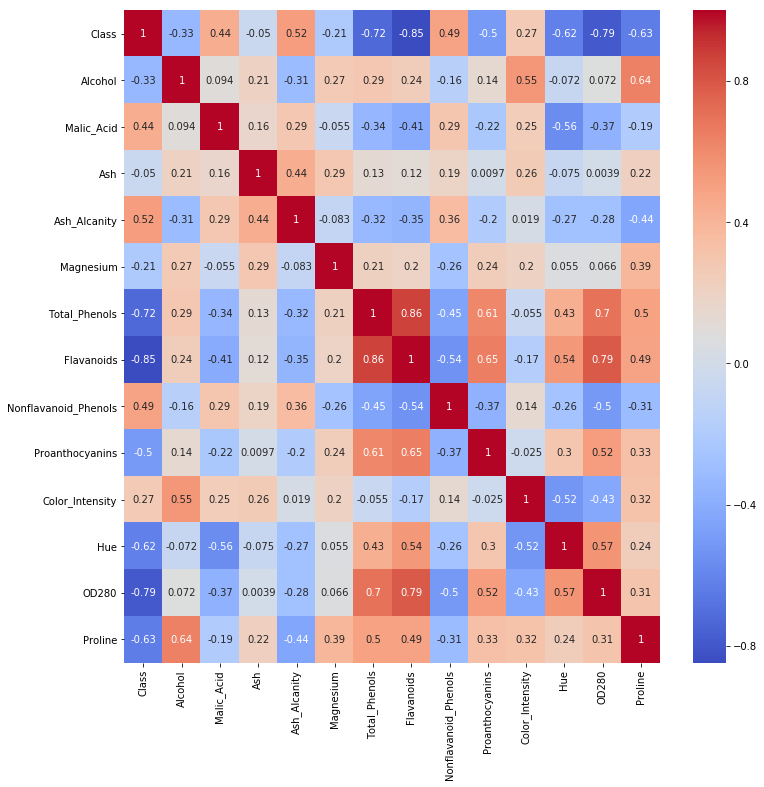

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [23]:
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [25]:
df.isnull().any()

Class                   False
Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

## Data preprocessing

** Split Features & Class (or target) **

In [10]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
print(X.shape,y.shape)

(178, 13) (178,)


** Split Train Test Sets **

In [11]:
seed = 7 #random seed for reproducibility
np.random.seed(seed)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [13]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([1, 2, 3], dtype=int64), array([52, 54, 36], dtype=int64))

** Scale features **

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [16]:
# Import libraries
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 97.7% +/- 3.4%
LDA: 98.6% +/- 4.3%
KNN: 96.6% +/- 5.5%
NB: 97.1% +/- 3.6%
DT: 93.5% +/- 6.0%
SVM: 97.8% +/- 3.4%
RF: 97.7% +/- 4.9%
XGB: 95.6% +/- 4.8%


Text(0,0.5,'Accuracy')

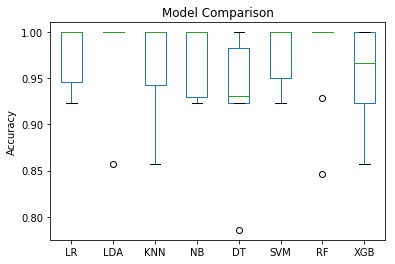

In [20]:
# cross validation
kfold = StratifiedKFold(n_splits=10, random_state=seed)
scoring = 'accuracy' 
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))
    
# model comparison
df_scores = pd.DataFrame(data = np.transpose(results),columns=names)
df_scores.plot(kind='box')
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve top 4 algorithms: LDA, SVM, LR, RF

#### Model 1: Linear Discriminant Analysis

In [38]:
# Default
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


Accuracy of test set: 97.2%


In [39]:
# Grid Search
model = LinearDiscriminantAnalysis()

# parameters
shrinkage = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
param_grid = [dict(solver=['svd']),dict(solver=['lsqr'], shrinkage=shrinkage)]
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.985915 (0.042588) with: {'solver': 'svd'}
0.985915 (0.042588) with: {'shrinkage': 0, 'solver': 'lsqr'}
0.992958 (0.021294) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.978873 (0.032226) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.978873 (0.032226) with: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.964789 (0.058131) with: {'shrinkage': 0.8, 'solver': 'lsqr'}
0.964789 (0.058131) with: {'shrinkage': 0.9, 'solver': 'lsqr'}
0.964789 (0.058131) with: {'shrinkage': 1.0, 'solver': 'lsqr'}


Best accuracy of training set: 99.3% using {'shrinkage': 0.2, 'solver': 'lsqr'}
Accuracy of test set: 100.0%


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


#### Model 2: Support Vector Machine

In [40]:
# Default
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy of test set: 100.0%


In [46]:
# Grid search
model = SVC(kernel='rbf')

# parameters
C = [20,10,1,0.1]
gamma = [1,0.1,0.01,0.001,'auto']
param_grid = dict(gamma=gamma, C=C)
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.697183 (0.067103) with: {'C': 20, 'gamma': 1}
0.978873 (0.032678) with: {'C': 20, 'gamma': 0.1}
0.964789 (0.035443) with: {'C': 20, 'gamma': 0.01}
0.985915 (0.029092) with: {'C': 20, 'gamma': 0.001}
0.985915 (0.028510) with: {'C': 20, 'gamma': 'auto'}
0.697183 (0.067103) with: {'C': 10, 'gamma': 1}
0.978873 (0.032678) with: {'C': 10, 'gamma': 0.1}
0.971831 (0.047220) with: {'C': 10, 'gamma': 0.01}
0.964789 (0.049111) with: {'C': 10, 'gamma': 0.001}
0.985915 (0.028510) with: {'C': 10, 'gamma': 'auto'}
0.654930 (0.084927) with: {'C': 1, 'gamma': 1}
0.978873 (0.032678) with: {'C': 1, 'gamma': 0.1}
0.978873 (0.033765) with: {'C': 1, 'gamma': 0.01}
0.802817 (0.079335) with: {'C': 1, 'gamma': 0.001}
0.978873 (0.033265) with: {'C': 1, 'gamma': 'auto'}
0.380282 (0.014173) with: {'C': 0.1, 'gamma': 1}
0.964789 (0.035443) with: {'C': 0.1, 'gamma': 0.1}
0.676056 (0.064430) with: {'C': 0.1, 'gamma': 0.01}
0.380282 (0.014173) with: {'

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


#### Model 3: Logistic Regression

In [47]:
# Default
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 97.2%


In [53]:
# Grid Search
model = LogisticRegression()

# parameters
penalty = ['l2','l1'] 
C = [20,10.0,1.0,0.1,0.01]
param_grid = dict(penalty=penalty, C=C)
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.985915 (0.029092) with: {'C': 20, 'penalty': 'l2'}
0.978873 (0.045907) with: {'C': 20, 'penalty': 'l1'}
0.985915 (0.029092) with: {'C': 10.0, 'penalty': 'l2'}
0.978873 (0.045907) with: {'C': 10.0, 'penalty': 'l1'}
0.978873 (0.033765) with: {'C': 1.0, 'penalty': 'l2'}
0.964789 (0.066112) with: {'C': 1.0, 'penalty': 'l1'}
0.978873 (0.032226) with: {'C': 0.1, 'penalty': 'l2'}
0.978873 (0.033765) with: {'C': 0.1, 'penalty': 'l1'}
0.964789 (0.058131) with: {'C': 0.01, 'penalty': 'l2'}
0.366197 (0.019648) with: {'C': 0.01, 'penalty': 'l1'}


Best accuracy of training set: 98.6% using {'C': 20, 'penalty': 'l2'}
Accuracy of test set: 94.4%


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


#### Model 5: RandomForest

In [54]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 100.0%


In [55]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [100, 200, 300]
max_depth = [2,4,6]
#criterion = ['gini','entropy']
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)#, criterion=criterion)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.971831 (0.049174) with: {'max_depth': 2, 'n_estimators': 100}
0.985915 (0.029092) with: {'max_depth': 2, 'n_estimators': 200}
0.985915 (0.029092) with: {'max_depth': 2, 'n_estimators': 300}
0.978873 (0.047154) with: {'max_depth': 4, 'n_estimators': 100}
0.985915 (0.029092) with: {'max_depth': 4, 'n_estimators': 200}
0.985915 (0.029092) with: {'max_depth': 4, 'n_estimators': 300}
0.978873 (0.047154) with: {'max_depth': 6, 'n_estimators': 100}
0.978873 (0.033765) with: {'max_depth': 6, 'n_estimators': 200}
0.978873 (0.033765) with: {'max_depth': 6, 'n_estimators': 300}


Best accuracy of training set: 98.6% using {'max_depth': 2, 'n_estimators': 200}
Accuracy of test set: 97.2%


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   20.5s finished


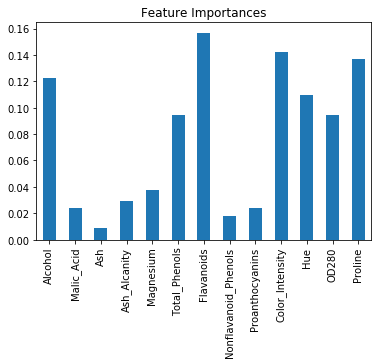

In [56]:
# Feature Importance
model = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('Class',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

## Final Model: LDA (shrinkage=0.2, solver='lsqr')

** Final Model **

In [57]:
model = LinearDiscriminantAnalysis(shrinkage=0.2, solver='lsqr')
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Save and load the final model **

In [ ]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        52
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00        36

avg / total       1.00      1.00      1.00       142



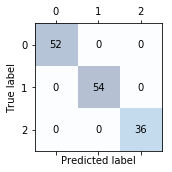

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [61]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 100.0%


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00        17
          3       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        36



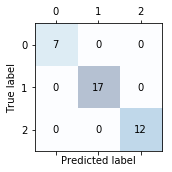

In [62]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Summary

Best model: **LinearDiscriminantAnalysis (LDA)** w/ param: shrinkage=0.2, solver='lsqr'

Accuracy of test set: **100%**